In [5]:
%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt

import time
import heatmap_setup as hm
import numpy as np

from SES_setup import *
from utils import *
from style import *

SES_setup loaded globally


In [17]:
def calculate_WC_add_steadystate_comparison(PARAMS, num, threshold=0., shift_in_additive=True):
    phonons = np.linspace(0.5, 50, 60)
    ti =time.time()
    rho_add = []
    rho_nonadd = []
    rho_wc = []
    rho_wcs = []
    op_list = []
    for j, alpha in enumerate(phonons):
        if alpha>30:
            N = PARAMS['N_1']+1
        PARAMS.update({'alpha_1':alpha, 'alpha_2': alpha})
        #energies, states = exciton_states(PARAMS)
        H, L, L_add, PARAMS = get_H_and_L(PARAMS, silent=True, threshold=threshold, shift_in_additive=shift_in_additive)
        H_wc, L_ns, L_s = get_H_and_L_wc(PARAMS['H_sub'], PARAMS)
        
        rho_add.append(steadystate(H[1], [L_add]))
        rho_nonadd.append(steadystate(H[1], [L]))
        rho_wc.append(steadystate(H[0], [L_ns]))
        rho_wcs.append(steadystate(H[0], [L_s]))
        op_list.append(make_expectation_operators(PARAMS))
        if j in [1,10,20,30,40,49]:
            print(alpha)
        #print ss.diag()
    data_dict = {}
    filename = 'DATA/WC_validity_ss/3ls_{}'.format(num)
    PARAM_names = ['rho_nonadd', 'rho_add', 'rho_wc', 'rho_wcs', 'op_list', 'phonons', 'PARAMS']
    scope = locals() # Lets eval below use local variables, not global
    data_dict.update(dict((name, eval(name, scope)) for name in PARAM_names))
    print("Calculation took {} seconds".format(time.time()-ti))
    try:
        save_obj(data_dict, filename)
        print( "Filename: "+filename)
    except Exception as e:
        print("Could not save file because: {}".format(e))
    return data_dict



In [18]:
def calculate_expval(rho_list, op_list, obs='OO'):
    return [(op_list[i][obs]*rho).tr() for i, rho in enumerate(rho_list)]

def plot_dynamics(data_dict):
    
    # code goes here to take in and plot dynamics for wc, add and non-add
    phonons =data_dict['phonons']
    
    labels = ['Redfield', 'Add.', 'Non-add.']
    f, ((ax1, ax2),(ax3, ax4))  = plt.subplots(2, 2, sharex=True, figsize=(14,8))
    for i, suff in enumerate(['_wc', '_add', '_nonadd']):
        if suff == '_wc':
            alpha=1
            ls='solid'
            op_list = [make_expectation_operators(PARAMS, weak_coupling=True)]*len(phonons)
        else:
            op_list =data_dict['op_list']
            alpha=0.5
            #ls='dotted'
        #GS pop
        ax1.plot(phonons, calculate_expval(data_dict['rho'+suff], op_list, obs='OO'), 
                 label=labels[i], alpha=alpha, ls=ls)
        ax1.set_ylabel(r"GS")
        ax1.set_xlim(phonons[0], phonons[-1])
        ax1.legend()
        #DS pop
        ax2.plot(phonons, calculate_expval(data_dict['rho'+suff], op_list, obs='dark'), 
                 label=labels[i], alpha=alpha, ls=ls)
        ax2.set_xlim(phonons[0], phonons[-1])
        ax2.set_ylabel(r"DS")
        ax2.legend()
        
        ax3.plot(phonons, calculate_expval(data_dict['rho'+suff], op_list, obs='bright'), 
                 label=labels[i], alpha=alpha, ls=ls)
        ax3.set_xlabel(r"$\alpha_1$, $\alpha_2$ $(cm^{-1})$")
        ax3.set_ylabel(r"BS")
        ax3.set_xlim(phonons[0], phonons[-1])
        ax3.legend()
        
        ax4.plot(phonons, calculate_expval(data_dict['rho'+suff], op_list, obs='eig_x'), 
                 label=labels[i], alpha=alpha, ls=ls)
        ax4.set_xlabel(r"$\alpha_1$, $\alpha_2$ $(cm^{-1})$")
        ax4.set_ylabel(r"$\Re \langle\{+\rangle\!\langle -|\rangle$")
        ax4.set_xlim(phonons[0], phonons[-1])
        ax4.legend()



# Low $\omega_0$

In [19]:
T_ph = 300.
w_2 = 5000. #1.4*ev_to_inv_cm
bias = 100. #0.01*ev_to_inv_cm #0.0000001*ev_to_inv_cm
V = 100. #0.01*ev_to_inv_cm #0.00001*ev_to_inv_cm
alpha = 1.
T_EM = 6000.
alpha_EM = 5.309e-3 # inv_ps_to_inv_cm *10^-3

In [21]:
N =5
#wc = 50.
w_0 = 150.
Gamma = 2*w_0

PARAMS = PARAMS_setup(bias=bias, w_2=w_2, 
                              V = V, alpha=alpha,
                              T_EM=T_EM, T_ph=T_ph, alpha_EM=alpha_EM, shift=True,
                              num_cpus=4, N=N, Gamma=Gamma, w_0=w_0,
                      silent=True, exc_diff=0)

data_dict_1 = calculate_WC_add_steadystate_comparison(PARAMS, '1a', threshold=0.)

1.3389830508474576
8.889830508474576
17.279661016949152
25.66949152542373
34.059322033898304
41.610169491525426
Calculation took 587.675539970398 seconds
Filename: DATA/WC_validity_ss/3ls_1a


In [16]:
data_dict_1 =load_obj("DATA/WC_validity_ss/3ls_1")

/Users/admin/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


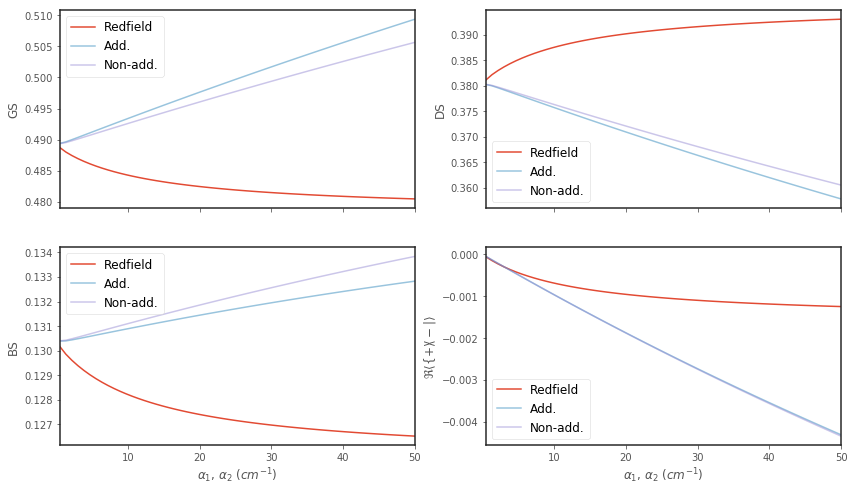

In [22]:
plot_dynamics(data_dict_1)

# larger $\omega_0$

In [14]:
w_0 = 500.
Gamma = 200.
N=5
T_ph = 300.
PARAMS = PARAMS_setup(bias=bias, w_2=w_2, 
                      V = V, alpha=alpha,
                      T_EM=T_EM, T_ph=T_ph, alpha_EM=alpha_EM, shift=True,
                      num_cpus=4, N=N, Gamma=Gamma, w_0=w_0,
                      silent=True, exc_diff=0)
data_dict_2 = calculate_WC_add_steadystate_comparison(PARAMS, 2, threshold=0.)

1.1265822784810127
6.765822784810126
13.031645569620252
19.29746835443038
25.563291139240505
31.20253164556962
Calculation took 719.3721060752869 seconds
Filename: DATA/WC_validity_ss/3ls_2


In [8]:
data_dict_2 =load_obj("DATA/WC_validity_ss/3ls_2")

/Users/admin/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


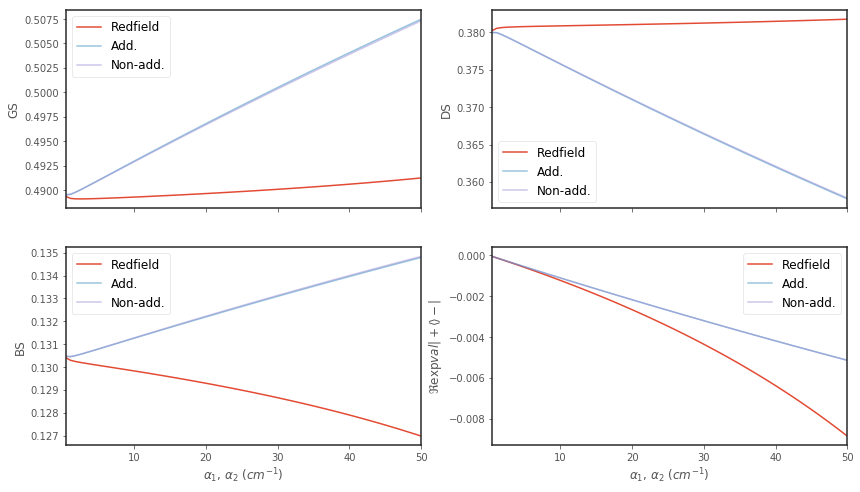

In [9]:
plot_dynamics(data_dict_2)

# Low $T_{ph}$

In [10]:
w_0 = 100.
Gamma = 200.
N=5
T_ph = 77.
PARAMS = PARAMS_setup(bias=bias, w_2=w_2, 
                              V = V, alpha=alpha,
                              T_EM=T_EM, T_ph=T_ph, alpha_EM=alpha_EM, shift=True,
                              num_cpus=4, N=N, Gamma=Gamma, w_0=w_0,
                      silent=True, exc_diff=0)
data_dict_3 = calculate_WC_add_steadystate_comparison(PARAMS, 3, threshold=0.)

KeyboardInterrupt: 

In [12]:
data_dict_3 =load_obj("DATA/WC_validity_ss/3ls_3")

/Users/admin/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


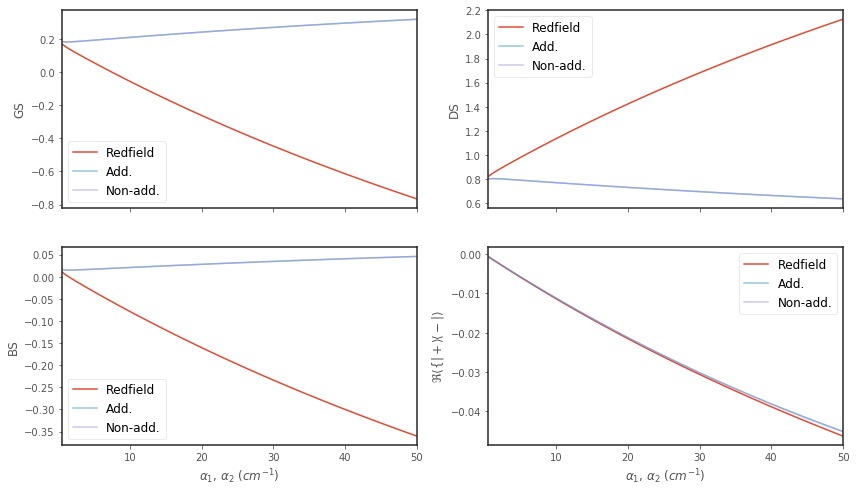

In [13]:
plot_dynamics(data_dict_3)

# very high $\omega_0$ (underdamped), but not larger than site energy

In [18]:
w_0 = 5000.
Gamma = 200.
N=5
T_ph = 300.
PARAMS = PARAMS_setup(bias=bias, w_2=w_2, 
                              V = V, alpha=alpha,
                              T_EM=T_EM, T_ph=T_ph, alpha_EM=alpha_EM, shift=True,
                              num_cpus=4, N=N, Gamma=Gamma, w_0=w_0,
                      silent=True, exc_diff=0)
data_dict_4 = calculate_WC_add_steadystate_comparison(PARAMS, 4, threshold=0.)

1.1265822784810127
6.765822784810126
13.031645569620252
19.29746835443038
25.563291139240505
31.20253164556962
Calculation took 830.3033878803253 seconds
Filename: DATA/WC_validity_ss/3ls_4


In [18]:
data_dict_4 =load_obj("DATA/WC_validity_ss/3ls_4")

/Users/admin/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


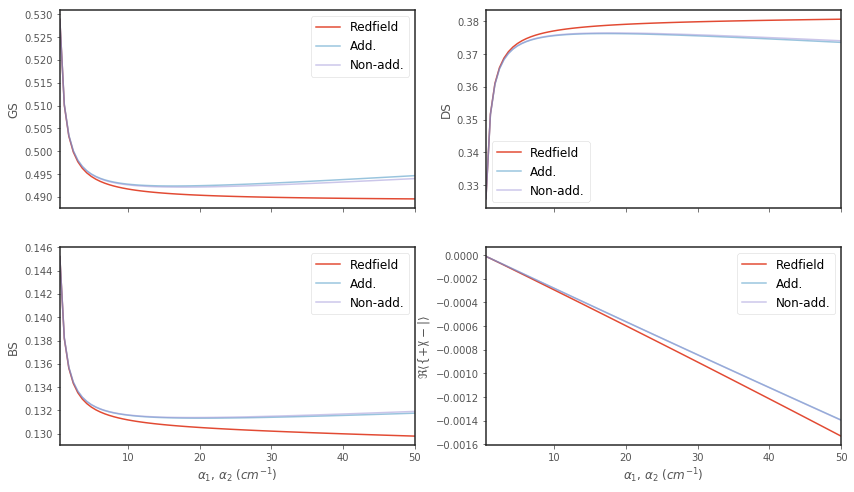

In [19]:
plot_dynamics(data_dict_4)

In [20]:
print (beta_f(300), beta_f(77), beta_f(100), beta_f(150))

0.004796163069544365 0.01868634962160142 0.014388489208633094 0.00959232613908873


# very high $\omega_0$ (overdamped), but not larger than site energy

In [20]:
w_0 = 5000. # 
Gamma = (w_0**2)/53.
N=4
T_ph = 300.
PARAMS = PARAMS_setup(bias=bias, w_2=w_2, 
                      V = V, alpha=alpha,
                      T_EM=T_EM, T_ph=T_ph, alpha_EM=alpha_EM, shift=True,
                      num_cpus=4, N=N, Gamma=Gamma, w_0=w_0,
                      silent=True, exc_diff=0)
data_dict_5 = calculate_WC_add_steadystate_comparison(PARAMS, 5, threshold=0.)

1.1265822784810127
6.765822784810126
13.031645569620252
19.29746835443038
25.563291139240505
31.20253164556962
Calculation took 8915.689085006714 seconds
Filename: DATA/WC_validity_ss/3ls_5


/Users/admin/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


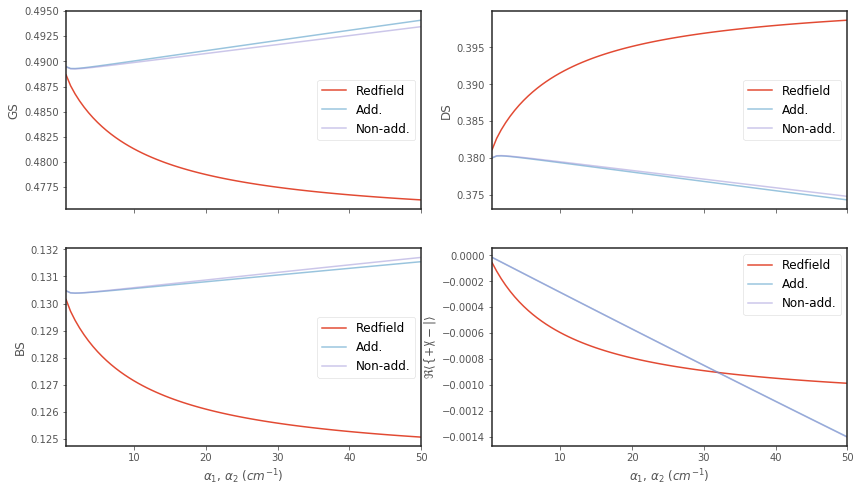

In [21]:
plot_dynamics(data_dict_5)